<a href="https://colab.research.google.com/github/COS-IT-FLOWS/Impacts/blob/main/LULC_impacted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import geopandas as gpd

# Load the road shapefile
lulc_gdf = gpd.read_file('/content/drive/MyDrive/Lowerbasin/sisdp_lsg_lower.shp')

# Load the boundary shapefile
boundary_gdf = gpd.read_file('/content/drive/MyDrive/Lowerbasin/lower_basin_lsg_panchayat.shp')

# Define a projected CRS
projected_crs = 'EPSG:32643'

# Create a table to store the results
results = []

# Loop through each polygon in the boundary shapefile
for i, polygon in boundary_gdf.iterrows():
    # Clip the road shapefile within the current polygon
    clipped_lulc = gpd.clip(lulc_gdf, polygon.geometry)

    # Re-project the clipped roads to the projected CRS
    clipped_lulc_projected = clipped_lulc.to_crs(projected_crs)

    # Calculate the sum of length of linestring within the polygon
    total_length = clipped_lulc_projected.length.sum()

    # Append the results to the table
    results.append({
        'Polygon Name': polygon['name'],
        'Sum of Length': total_length/1000
    })

# Print the table
print("Polygon Name\tSum of Length")
for result in results:
    print(f"{result['Polygon Name']}\t{result['Sum of Length']:.2f}")

Polygon Name	Sum of Length
Kochi	50.41
Kodassery	321.66
Pariyaram	227.45
Meloor	174.49
Koratty	187.60
Aloor	281.24
Chalakudy	123.40
Kadukutty	122.38
Annamanada	194.14
Kuzhur	180.94
Mala	204.07
Poyya	152.07
Kodungallur	106.85
Eriyad	89.50
Edavilangu	39.54
Sree Narayanapuram	80.12
Mathilakam	37.93
Perinjanam	30.09
Padiyoor	133.03
Vellangalur	206.53
Puthenchira	170.01
Velookkara	222.65
Poomangalam	58.01
Ayyampuzha Gramapanchayath	378.22
Vengoor Gramapanchayath	441.41
Koovappady Gramapanchayath	210.09
Mudakkuzha Gramapanchayath	189.62
Malayattoor-Neeleswaram Gramapanchayath	177.80
Kalady Gramapanchayath	124.38
Manjapra Gramapanchayath	96.32
Thuravoor Gramapanchayat	169.55
Mookkannoor Gramapanchayath	216.44
Karukutty Gramapanchayath	238.94
Parakkadavu Gramapanchayath	205.63
Angamaly	151.68
Nedumbassery Gramapanchayath	171.10
Sreemoolanagaram Gramapanchayath	119.40
Chengamanadu Gramapanchayath	146.57
Okkal Gramapanchayath	57.00
Perumbavoor	53.56
Rayamangalam Gramapanchayath	287.52
Vengola Gr

No valid geometries for polygon 50. Skipping...


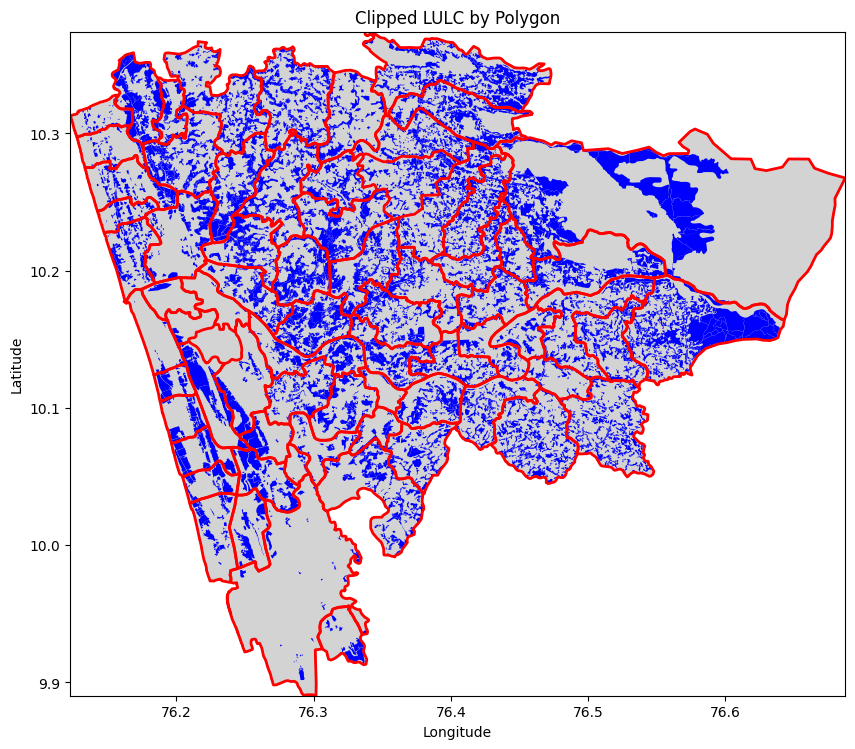

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the lulc and boundary shapefiles
lulc_gdf = gpd.read_file('/content/drive/MyDrive/Lowerbasin/sisdp_lsg_lower.shp')
boundary_gdf = gpd.read_file('/content/drive/MyDrive/Lowerbasin/lower_basin_lsg_panchayat.shp')

# Create an empty GeoDataFrame to hold all clipped lulc
all_clipped_lulc = gpd.GeoDataFrame()

# Define a color for the selected polygon and background polygon
selected_color = 'red'
background_color = 'lightblue'  # Color for polygon 5

# Plotting setup
fig, ax = plt.subplots(figsize=(10, 10))  # create a figure and axis object for the plot

# Plot all polygons in light gray
boundary_gdf.plot(ax=ax, color='lightgray', edgecolor='black')

# Highlight polygon 5 in the background
# polygon_5 = boundary_gdf.iloc[4]  # Adjust index if needed (0-based index)
# gpd.GeoSeries(polygon_5.geometry.boundary).plot(ax=ax, color=background_color, linewidth=2)

# Set the limits based on the boundary
ax.set_xlim(boundary_gdf.total_bounds[[0, 2]])  # minx, maxx
ax.set_ylim(boundary_gdf.total_bounds[[1, 3]])  # miny, maxy

# Loop through each polygon in the boundary shapefile
for i, polygon in boundary_gdf.iterrows():
    # Clip the lulc shapefile within the current polygon
    clipped_lulc = gpd.clip(lulc_gdf, polygon.geometry)

    # Check for empty or invalid geometries
    if clipped_lulc.empty or not clipped_lulc.is_valid.all():
        print(f"No valid geometries for polygon {i}. Skipping...")
        continue  # Skip to the next polygon if there are no valid geometries

    # Append to all_clipped_lulc GeoDataFrame using pandas.concat
    all_clipped_lulc = pd.concat([all_clipped_lulc, clipped_lulc], ignore_index=True)  # Use pd.concat instead of append

    # Plotclipped lulc for the current polygon in blue
    clipped_lulc.plot(ax=ax, color='blue', linewidth=1)

    # # Add the name of the polygon as a label
    # ax.text(polygon.geometry.centroid.x, polygon.geometry.centroid.y,
    #         polygon['name'], fontsize=10, ha='center', color='black')

    # Highlight the current polygon in red if it's not polygon 5
    if i != 4:  # Adjust index if needed (0-based index)
        # Convert the boundary to a GeoSeries for plotting
        gpd.GeoSeries(polygon.geometry.boundary).plot(ax=ax, color=selected_color, linewidth=2)  # Since polygon.geometry.boundary is a LineString. Convert to a GeoSeries for plotting.

# Set plot title and labels
plt.title("Clipped LULC by Polygon")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()  # show the plot

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate  # Make sure to import tabulate for pretty printing

def process_and_analyze_lulc(thresholds, elevation_shp_path, lulc_shp_path, boundary_shp_path):
    for threshold in thresholds:
        output_shp = f"/content/drive/MyDrive/Lowerbasin/EXTRACTED_FILES/{threshold}poly_lower.shp"

        # Load the elevation shapefile (at or below threshold)
        elevation_shp = gpd.read_file(output_shp)

        # Load the lulc shapefile
        lulc_shp = gpd.read_file(lulc_shp_path)

        # Perform the intersection operation to clip the lulc
        clipped_lulc = gpd.overlay(lulc_shp, elevation_shp, how='intersection')

        # Save the clipped lulc to a new shapefile
        clipped_lulc.to_file(f'/content/drive/MyDrive/Lowerbasin/clipp_lulc/{threshold}lulc.shp', driver='ESRI Shapefile')

        # Load the clipped lulc shapefile
        clipped_lulc = gpd.read_file(f'/content/drive/MyDrive/Lowerbasin/clipp_lulc/{threshold}lulc.shp')

        # Load the boundary shapefile
        boundary_shp = gpd.read_file(boundary_shp_path)

        # Reproject the clipped lulc and boundary shapefile to 'EPSG:32643'
        clipped_lulc = clipped_lulc.to_crs(epsg=32643)
        boundary_shp = boundary_shp.to_crs(epsg=32643)

        # Initialize a list to store results
        results = []

        # Iterate through each polygon in the boundary shapefile
        for index, polygon in boundary_shp.iterrows():
            # Clip the lulc within the current polygon
            clipped_features = gpd.clip(clipped_lulc, polygon.geometry)

            # Calculate the area of the clipped features in square kilometers
            clipped_area = clipped_features.area.sum() / 10**6  # Convert from m² to km²

            # Append the results to the list
            results.append({
                'Polygon Name': polygon['name'],  # Assuming 'name' is the field for polygon names
                'Clipped Area (km²)': round(clipped_area, 2)  # Round to 2 decimal places
            })

        # Create a DataFrame from the results
        results_df = pd.DataFrame(results)

        # Calculate the total area of all clipped features
        total_clipped_area = results_df['Clipped Area (km²)'].sum()

        # Append a row for the total clipped area using pandas.concat
        total_row = pd.DataFrame([{'Polygon Name': 'Total Clipped', 'Clipped Area (km²)': total_clipped_area}])
        results_df = pd.concat([results_df, total_row], ignore_index=True)  # Use pd.concat since pandas is imported as pd

        # Print the results
        print(tabulate(results_df[['Polygon Name', 'Clipped Area (km²)']], headers='keys', tablefmt='pretty'))

# Example usage
thresholds = [12.48]
elevation_shp_path = "/content/drive/MyDrive/Lowerbasin/EXTRACTED_FILES/{threshold}poly_lower.shp"
lulc_shp_path = '/content/drive/MyDrive/Lowerbasin/sisdp_lsg_lower.shp'  # Updated path for LULC shapefile
boundary_shp_path = '/content/drive/MyDrive/Lowerbasin/lower_basin_lsg_panchayat.shp'

process_and_analyze_lulc(thresholds, elevation_shp_path, lulc_shp_path, boundary_shp_path)

+----+-----------------------------------------+--------------------+
|    |              Polygon Name               | Clipped Area (km²) |
+----+-----------------------------------------+--------------------+
| 0  |                  Kochi                  |        2.37        |
| 1  |                Kodassery                |        1.03        |
| 2  |                Pariyaram                |        3.03        |
| 3  |                 Meloor                  |        3.65        |
| 4  |                 Koratty                 |        2.37        |
| 5  |                  Aloor                  |        6.82        |
| 6  |                Chalakudy                |        4.78        |
| 7  |                Kadukutty                |        5.83        |
| 8  |               Annamanada                |        9.6         |
| 9  |                 Kuzhur                  |        9.55        |
| 10 |                  Mala                   |        9.02        |
| 11 |              